**Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

**Importing dataset**

In [2]:
titanic_data=pd.read_csv("/kaggle/input/titanic/train.csv")
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
titanic_data.shape

(891, 12)

**Numeric column information**

In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Some general dataset info

# Exploratory Data Analysis

In [6]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


**Male to female ratio**

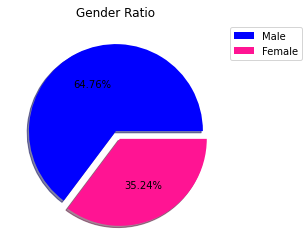

In [7]:
colors=("blue","deeppink")
ax = titanic_data['Sex'].value_counts().plot(
    kind="pie",
    colors=colors,
    autopct='%0.2f%%',
    shadow=True,
    explode=[0, 0.1],
    legend=True,
    title='Gender Ratio',
    ylabel='',
    labeldistance=None
)
ax.legend(("Male", "Female"),bbox_to_anchor=(1,1), loc='upper left')
plt.show()

It's clear from the above pie chart that more males are there as compared to females.

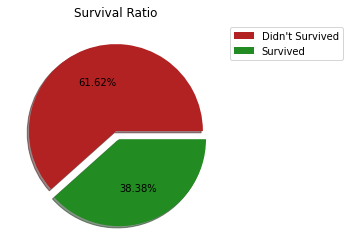

In [8]:
colors=("firebrick","forestgreen")
ax = titanic_data['Survived'].value_counts().plot(
    kind="pie",
    autopct='%0.2f%%',
    shadow=True,
    colors=colors,
    explode=[0, 0.1],
    legend=True,
    title='Survival Ratio',
    ylabel='',
    labeldistance=None
)
ax.legend(("Didn't Survived", "Survived"),bbox_to_anchor=(1,1), loc='upper left')
plt.show()

As per the dataset, ~40% people did make it through the TITANIC sink.

[Text(0, 0, "Didn't Survived"), Text(1, 0, 'Survived')]

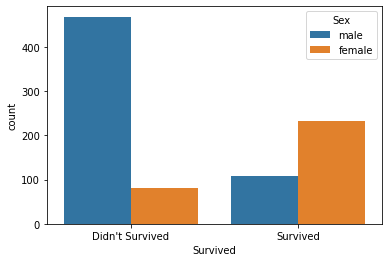

In [9]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data).set_xticklabels(("Didn't Survived","Survived"))

More females survived as compared to males in the TITANIC sink.

<AxesSubplot:ylabel='Frequency'>

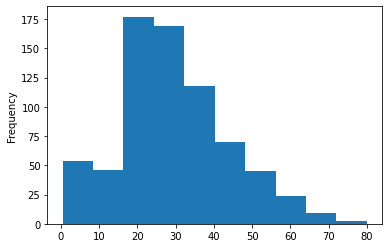

In [10]:
titanic_data['Age'].plot.hist()

The above plot shows the age distribution of the people present on the ship.

# Data Cleansing

**Checking null values in dataset**

In [11]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Columns: Age, Cabin, Embarked contains null values.

<AxesSubplot:>

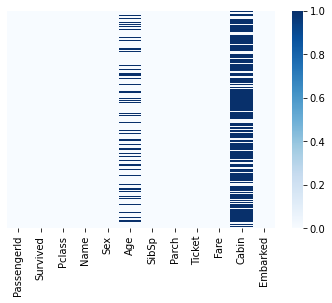

In [12]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap='Blues')

The above figure shows the heatmap of null values. It shows 'Cabin' has huge null values.

**Handling missing values**

Age: We will use the median method to fill the null values with the median value.

In [13]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

Cabin:
    Since 'Cabin' contains huge no. of null values and also seems to be a redundant column, so we will drop this column from the dataframe in later stage, along with other redundant columns.

Embarked:
     As the no. of null values in this columns is very small, i.e. negligible, so will drop the null values for this column.

In [14]:
titanic_data.dropna(subset=['Embarked'], inplace=True)

<AxesSubplot:>

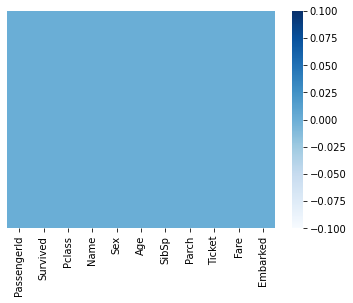

In [15]:
sns.heatmap(titanic_data.drop('Cabin', axis=1).isnull(), yticklabels=False, cmap='Blues')

The above figure shows heatmap for null values after handling missing values. No null values in the dataframe(except 'Cabin').

**Checking presence of duplicates**

In [16]:
percentage = titanic_data.duplicated(keep=False).value_counts(normalize=True) * 100
print (percentage)

False    100.0
dtype: float64


Hence no duplicate values are there in the dataset.

**Dropping redundant columns**

In [17]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [18]:
titanic_data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
titanic_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


# Data preparation

**Data encoding**

In [19]:
encd_data=pd.get_dummies(titanic_data,columns=['Sex','Embarked'],drop_first=True)
encd_data.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0


Here, get_dummies method is used, OneHotEncoding, for encoding the categorical columns.

**Segragating independant and dependant(target class) features**

In [20]:
X=encd_data.drop(['Survived'], axis=1)
Y=encd_data['Survived']

**Splitting the data into training and testing**

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=12)

# Model Training/Testing

**Training the models:** <br> DecisionTreeClassifier <br> RandomForestClassifier

In [22]:
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()

In [23]:
dtc.fit(X_train,Y_train)
rfc.fit(X_train,Y_train)

RandomForestClassifier()

Making predictions over the test data

In [24]:
dtc_pred=dtc.predict(X_test)
rfc_pred=rfc.predict(X_test)

**Model Performance**

In [25]:
dtc_score=accuracy_score(Y_test,dtc_pred)
rfc_score=accuracy_score(Y_test,rfc_pred)
print("Accuracy Score for DecsionTreeClassifier  :", round(dtc_score*100,2))
print("Accuracy Score for RandomForestClassifier :", round(rfc_score*100,2))

Accuracy Score for DecsionTreeClassifier  : 77.53
Accuracy Score for RandomForestClassifier : 79.78


Hence, RandomForestClassifier model is a bit better model for this particular dataset as compared with DecisionTreeClassifier model.

# Feature Importance

**Function for feature importance**

In [26]:
def feature_importance(model):
    global X_train
    feat_imp = pd.DataFrame({'Features': X_train.columns, 'Importance': model.feature_importances_})
    feat_imp = feat_imp.sort_values('Importance',ascending=False).reset_index(drop=True)
    plt.figure(figsize=(15,3))
    sns.barplot(x='Importance',y='Features',data=feat_imp)
    plt.show()   

**Feature Importance for DecisionTreeClassifier model**

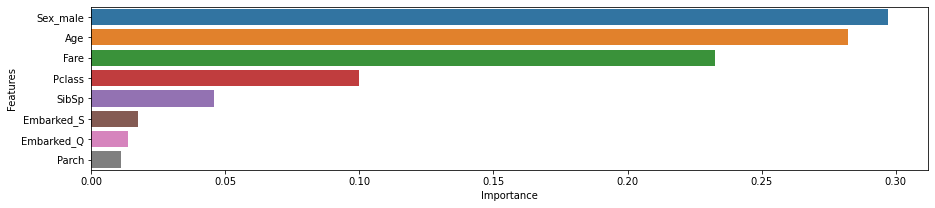

In [27]:
feature_importance(dtc)

From the above plot,"Sex_male" is the most significant feature among the independant features for the prediction using DecsionTreeClassifier, whereas "Embarked_Q" is the least significant feature.

**Feature Importance for RandomForestClassifier model**

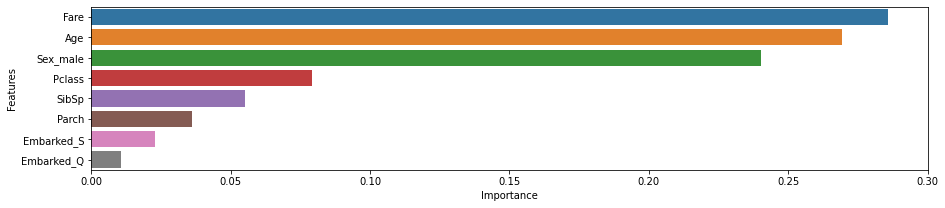

In [28]:
feature_importance(rfc)

From the above plot,"Fare" is the most significant feature among the independant features for the prediction using RandomForestClassifier, whereas "Embarked_Q" is the least significant feature.